# Explore the RealImpact dataset

The `dataset` directory is expected to have been generated with:
```shell
$ cd dataset
$ bash download.sh
```

In [1]:
import ipywidgets as widgets
from os import listdir
from os.path import join, isdir
import json
import re
import numpy as np
import matplotlib.pyplot as plt

DatasetPath = 'dataset/'
DatasetNames = sorted([d for d in listdir(DatasetPath) if isdir(join(DatasetPath, d))])
M = len(DatasetNames)

print("M = {}".format(M))

M = 50


In [2]:
select_directory = widgets.Dropdown(
    value='60_SkullCup',
    description='Dataset:',
    options=DatasetNames,
)

# These globals always reflect the most recently selected dataset.
ObjectName = ""
ObjectPath = ""
ObjectFiles = []

def set_object(object_name):
    global ObjectName, ObjectPath, ObjectFiles
    ObjectName = object_name
    ObjectPath = join(DatasetPath, object_name, "preprocessed")
    ObjectFiles = sorted(listdir(ObjectPath))
    values_formatted = json.dumps(
        {
            "ObjectPath": ObjectPath,
            "ObjectFiles": ObjectFiles,
        },
        indent=4,
    )
    # Surround variable names with backticks instead of quotes.
    values_formatted = re.sub('\"(.*)\"\: (.*)', r'`\1`: \2', values_formatted)
    print("New object selected. Updated globals:\n{}".format(values_formatted))

def on_dataset_directory_change(event):
    if event['type'] == 'change' and event['name'] == 'value':
        set_object(event['new'])


select_directory.observe(on_dataset_directory_change)
set_object(select_directory.value)

select_directory 

New object selected. Updated globals:
{
    `ObjectPath`: "dataset/60_SkullCup/preprocessed",
    `ObjectFiles`: [
        "angle.npy",
        "deconvolved_0db.npy",
        "distance.npy",
        "listenerXYZ.npy",
        "material_0.mtl",
        "material_0.png",
        "micID.npy",
        "transformed.obj",
        "vertexID.npy",
        "vertexXYZ.npy"
    ]
}


Dropdown(description='Dataset:', index=23, options=('100_Frisbee', '10_bowl', '17_IronSkillet', '19_Pan', '22_…

Expected `ObjectFiles` value:
```
[ 
    "angle.npy",
    "deconvolved_0db.npy",
    "distance.npy",
    "listenerXYZ.npy",
    "material_0.mtl"
    "material_0.png",
    "micID.npy",
    "transformed.obj",
    "vertexID.npy",
    "vertexXYZ.npy",
]
```

`PreprocessedFiles` is expected to contain the above file names for any chosen dataset.

## `transformed.obj`

TODO visualize mesh.

Try https://github.com/mikedh/trimesh



In [3]:
transformed_obj_file = open(join(ObjectPath, "transformed.obj"), 'r')
transformed_obj_file

<_io.TextIOWrapper name='dataset/60_SkullCup/preprocessed/transformed.obj' mode='r' encoding='UTF-8'>

## `micID.npy`

From the "Hardware setup" secion of the paper:

> The gantry system moves a 1.82-meter-tall vertical column of 15 Dayton Audio EMM6 calibrated measurement microphones which are evenly and precisely spaced along the column. It moves this column precisely in two degrees of freedom: azimuth and distance, with a precision of $1\degree$ and $1 \text{mm}$, respectively. We suspended a mesh of polyester threads precisely at the axis of rotation of this gantry, centering it vertically along the column of 15 microphones. This mesh holds the objects in place while minimizing contact damping and maximizing the acoustic transparency of the surface holding the object. Furthermore, the layout of the mesh provides visual guidance for precisely positioning the objects in a repeatable manner.

In [4]:
mic_ids = np.load(join(ObjectPath, "micID.npy"))
mic_count = len(np.unique(mic_ids))
display(mic_ids)
print(f"`mic_ids`:\n\tShape: {mic_ids.shape}\n\tAll {mic_count} microphone IDs: {np.unique(mic_ids)}")

array([ 0,  1,  2, ..., 12, 13, 14])

`mic_ids`:
	Shape: (3000,)
	All 15 microphone IDs: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Text(0, 0.5, 'Microphone ID')

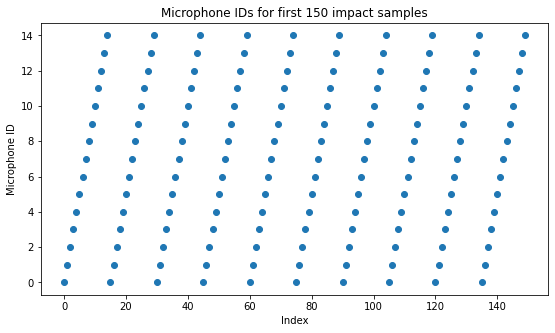

In [5]:
# Plot microphone ID for each index.
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title(f"Microphone IDs for first {mic_count * 10} impact samples")
plt.plot(mic_ids[:mic_count*10], 'o')

plt.xlabel("Index")
plt.ylabel("Microphone ID")


## `angle.npy` / `distance.npy`

In [6]:
angles = np.load(join(ObjectPath, "angle.npy"))
distance = np.load(join(ObjectPath, "distance.npy"))
print(f"`angles`:\n\tShape: {angles.shape}\n\tUnique values: {np.unique(angles)}")
print(f"`distance`:\n\tShape: {distance.shape}\n\tUnique values: {np.unique(distance)}")

`angles`:
	Shape: (3000,)
	Unique values: [  0  20  40  60  80 100 120 140 160 180]
`distance`:
	Shape: (3000,)
	Unique values: [   0  333  666 1000]


Text(0, 0.5, 'Distance (mm)')

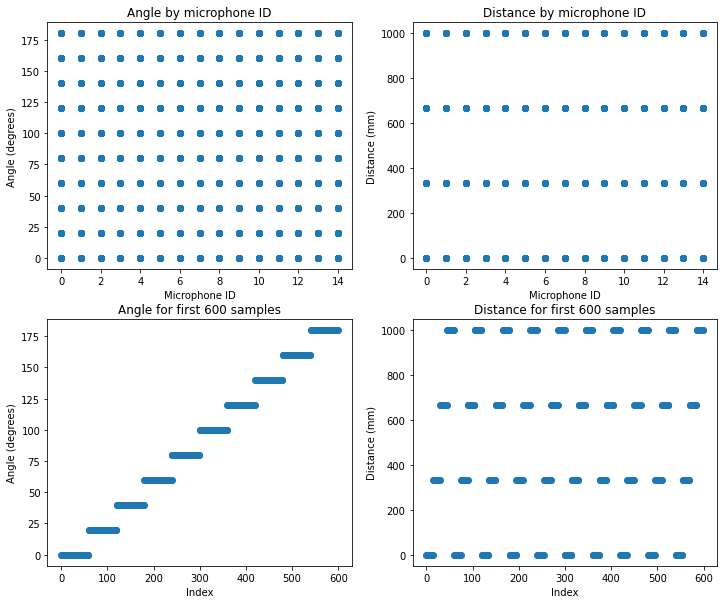

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0][0].plot(mic_ids, angles, 'o')
ax[0][0].set_title("Angle by microphone ID")
ax[0][0].set_xlabel("Microphone ID")
ax[0][0].set_ylabel("Angle (degrees)")

ax[0][1].plot(mic_ids, distance, 'o')
ax[0][1].set_title("Distance by microphone ID")
ax[0][1].set_xlabel("Microphone ID")
ax[0][1].set_ylabel("Distance (mm)")

num_angle_distance_samples = mic_count * 40
ax[1][0].plot(angles[:num_angle_distance_samples], 'o')
ax[1][0].set_title(f"Angle for first {num_angle_distance_samples} samples")
ax[1][0].set_xlabel("Index")
ax[1][0].set_ylabel("Angle (degrees)")

ax[1][1].plot(distance[:num_angle_distance_samples], 'o')
ax[1][1].set_title(f"Distance for first {num_angle_distance_samples} samples")
ax[1][1].set_xlabel("Index")
ax[1][1].set_ylabel("Distance (mm)")

## `listenerXYZ.npy`

In [8]:
listenerXYZ = np.load(join(ObjectPath, "listenerXYZ.npy"))
display(listenerXYZ)
print("Shape: {}".format(listenerXYZ.shape))

array([[ 0.23   , -0.04345, -0.91   ],
       [ 0.23   , -0.04345, -0.78   ],
       [ 0.23   , -0.04345, -0.65   ],
       ...,
       [-1.23   ,  0.04345,  0.65   ],
       [-1.23   ,  0.04345,  0.78   ],
       [-1.23   ,  0.04345,  0.91   ]])

Shape: (3000, 3)


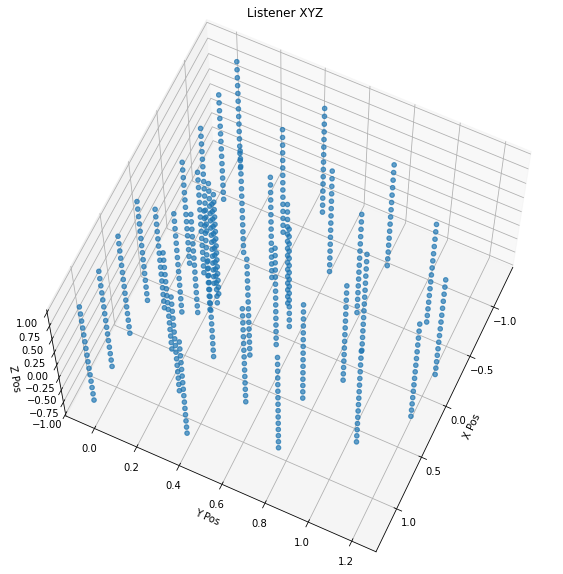

In [21]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_title('Listener XYZ')
ax.set_xlabel('X Pos')
ax.set_ylabel('Y Pos')
ax.set_zlabel('Z Pos')
ax.view_init(elev=65, azim=25)

ax.scatter(listenerXYZ[:,0], listenerXYZ[:,1], listenerXYZ[:,2], marker='o', alpha=0.2)

## `deconvolved_0db.npy`

`deconvolved_0db.npy` contains 3,000 4-second long audio files recorded at 48 kHz.

Each of the 50 recorded objects, were struck from 5 distinct impact positions. Each impact was recorded at 600 field points to provide comprehensive coverage of the frequency components of the sounds and how they are distributed spatially.

Total recorded impacts: $5 * 600 = 3,000$ for each object, for a total of 150,000 recorded audio clips.

In [10]:
SampleRate = 48_000

deconvolved_0db = np.load(join(ObjectPath, "deconvolved_0db.npy"))
print(f"`deconvolved_0db`:\n\tShape: {deconvolved_0db.shape}\n\tObject {ObjectName} has {deconvolved_0db.shape[0]} impact samples with {deconvolved_0db.shape[1]} frames ({(deconvolved_0db.shape[1]/SampleRate):.3f}s) each.")

`deconvolved_0db`:
	Shape: (3000, 209549)
	Object 60_SkullCup has 3000 impact samples with 209549 frames (4.366s) each.


In [11]:
from IPython.display import Audio

SampleIndex = 0

def on_sample_index_change(event):
    global SampleIndex
    if event['type'] == 'change' and event['name'] == 'value':
        SampleIndex = event['new']


select_sample_index = widgets.IntText(value=0, description="Sample index:")
select_sample_index.observe(on_sample_index_change)

display(select_sample_index)

IntText(value=0, description='Sample index:')

In [16]:
print(f"{ObjectName} impact sample #{SampleIndex}:\n\tDistance: {distance[SampleIndex]}mm\n\tAngle: {angles[SampleIndex]} degrees\n\tMicrophone ID: {mic_ids[SampleIndex]}")
display(Audio(deconvolved_0db[SampleIndex], rate=48000))

60_SkullCup impact sample #15:
	Distance: 333mm
	Angle: 0 degrees
	Microphone ID: 0


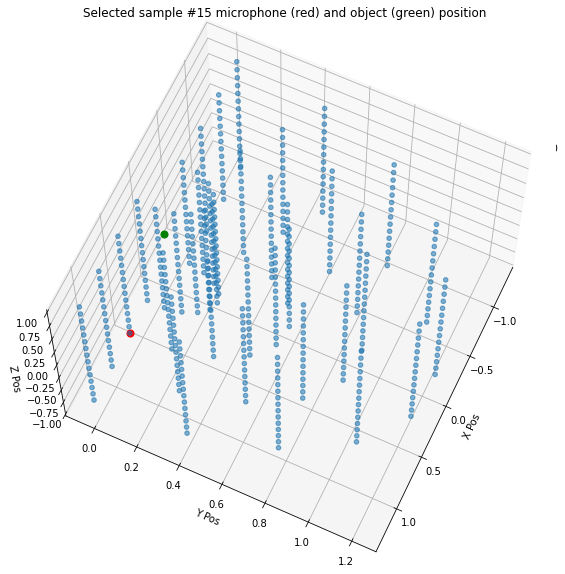

In [28]:
# Plot the 3D position of the selected sample.

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax = fig.add_subplot(111, projection='3d')
ax.set_title(f'Selected sample #{SampleIndex} microphone (red) and object (green) position')
ax.set_xlabel('X Pos')
ax.set_ylabel('Y Pos')
ax.set_zlabel('Z Pos')
ax.view_init(elev=65, azim=25)

ax.scatter(listenerXYZ[:,0], listenerXYZ[:,1], listenerXYZ[:,2], marker='o', alpha=0.15)
ax.scatter(0, 0, 0, marker='o', s=50, color='green')
ax.scatter(listenerXYZ[SampleIndex,0], listenerXYZ[SampleIndex,1], listenerXYZ[SampleIndex,2], marker='o', s=50, color='red')